# Effects of remittances

To understand patterns of global remittances, we will use country-to-country data of transaction costs, FDI, imports and exports, and scores of homophily. 

In [3]:
# Use this pip install command to install the world bank installer and the country converter. 
# pip install wbdata
# pip install country-converter

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

#https://wbdata.readthedocs.io/en/stable/
#This is the world bank data API caller
import wbdata
import networkx as nx
import numpy as np

In [5]:
transfer_cost_raw = pd.read_excel("/Users/johannes/Desktop/Minerva/International Money & Finance/BidirectionalTransferCost2016_2020.xlsx")

In [6]:
remit_inflows = pd.read_excel("/Users/johannes/Desktop/Minerva/International Money & Finance/RemittanceInflows1980_2019.xlsx")

In [7]:
transfer_cost_raw.head()

,id,period,source_code,source_name,source_region,source_income,source_lending,source_G8G20,destination_code,destination_name,...,cc2 fx margin,cc2 total cost %,inter lcu bank fx,transparent,Standard Note,note2,receiving network coverage,pickup method,date,corridor
0,620160001,2016_2Q,AGO,Angola,Sub-Saharan Africa,Lower middle income,IBRD,..,NAM,Namibia,...,7.49,14.36,0.0908,yes,NaN,NaN,High,Agent,11/May/2016,AGONAM
1,620160002,2016_2Q,AGO,Angola,Sub-Saharan Africa,Lower middle income,IBRD,..,NAM,Namibia,...,4.19,11.78,0.0908,yes,NaN,NaN,High,Agent,11/May/2016,AGONAM
2,620160003,2016_2Q,AGO,Angola,Sub-Saharan Africa,Lower middle income,IBRD,..,NAM,Namibia,...,0.00,10.93,1.0000,no,This RSP is not transparent: the exchange rate...,NaN,Low,NaN,11/May/2016,AGONAM
3,620160004,2016_2Q,ARE,United Arab Emirates,..,High income,..,..,BGD,Bangladesh,...,0.08,1.17,21.3380,yes,NaN,NaN,High,Agent,09/May/2016,AREBGD
4,620160005,2016_2Q,ARE,United Arab Emirates,..,High income,..,..,BGD,Bangladesh,...,0.13,0.95,21.3380,yes,NaN,NaN,High,Agent,09/May/2016,AREBGD


In [8]:
remit_inflows.head()

,Migrant remittance inflows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020e,Remittances as a share of GDP in 2020e (%)
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,219.416087,347.165292,253.367822,348.624717,627.710802,822.731630,803.546454,828.571904,784.71,0.0408003
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1419.772515,1281.848114,1421.007454,1290.863508,1306.009167,1311.822432,1458.210056,1472.812242,1385.5,0.098711
2,Algeria,406.0,447.0,507.0,392.0,329.0,313.0,358.0,487.0,379.0,...,214.841269,209.601443,2452.442617,1997.393458,1989.023597,1791.681572,1791.681572,1791.681572,1643.18,0.0111063
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-


In [9]:
## https://www.worldbank.org/en/topic/migrationremittancesdiasporaissues/brief/migration-remittances-data
bilateral_flows = pd.read_excel("/Users/johannes/Desktop/Minerva/International Money & Finance/bilateralmigrationmatrix20170_Apr2018.xlsx", header = 1)

In [10]:
bilateral_flows.head()
                              -                                                                                        Source country (down) '])]

IndentationError: unexpected indent (<ipython-input-10-0c5748e78485>, line 2)

In [13]:
bilateral_flows_long = pd.melt(bilateral_flows, id_vars= ['Destination country (across)                                                              -                                                                                        Source country (down) '])

In [14]:
bilateral_flows['Destination country (across)                                                              -                                                                                        Source country (down) '].values

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Faeroe Islands', 'Fiji', 'Finland',
       'France', 

In [15]:
bilateral_flows_long.columns = ["Sender", "Receiver", "Value"]

In [16]:
import country_converter as coco

In [17]:
cc = coco.CountryConverter()

In [19]:
bilateral_flows_long['Sender']

0                  Afghanistan
1                      Albania
2                      Algeria
3               American Samoa
4                      Andorra
                 ...          
45791    Virgin Islands (U.S.)
45792       West Bank and Gaza
45793              Yemen, Rep.
45794                   Zambia
45795                 Zimbabwe
Name: Sender, Length: 45796, dtype: object

In [20]:
np.asarray(bilateral_flows_long['Sender'].values[:-3])

array(['Afghanistan', 'Albania', 'Algeria', ..., 'Vietnam',
       'Virgin Islands (U.S.)', 'West Bank and Gaza'], dtype=object)

In [21]:
bilateral_flows_long['SenderIso'] = [cc.convert(full_name, to='ISO3') for full_name in np.asarray(bilateral_flows_long['Sender'])]
bilateral_flows_long['ReceiverIso'] = [cc.convert(full_name, to='ISO3') for full_name in np.asarray(bilateral_flows_long['Receiver'])]

Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not found in regex
Channel Islands not 

In [39]:
bilateral_flows_long.drop(bilateral_flows_long[bilateral_flows_long['Receiver'] == bilateral_flows_long['Sender']].index, inplace= True)
bilateral_flows_long.drop(bilateral_flows_long[bilateral_flows_long['ReceiverIso'] == 'not found'].index, inplace= True)
bilateral_flows_long.drop(bilateral_flows_long[bilateral_flows_long['SenderIso'] == 'not found'].index, inplace= True)

In [40]:
bilateral_flows_long.head()

,Sender,Receiver,Value,SenderIso,ReceiverIso
1,Albania,Afghanistan,0.0,ALB,AFG
2,Algeria,Afghanistan,0.0,DZA,AFG
3,American Samoa,Afghanistan,0.0,ASM,AFG
4,Andorra,Afghanistan,0.0,AND,AFG
5,Angola,Afghanistan,0.0,AGO,AFG


In [90]:
g = nx.DiGraph()
g = nx.from_pandas_edgelist(bilateral_flows_long, 'SenderIso', 'ReceiverIso', "Value")

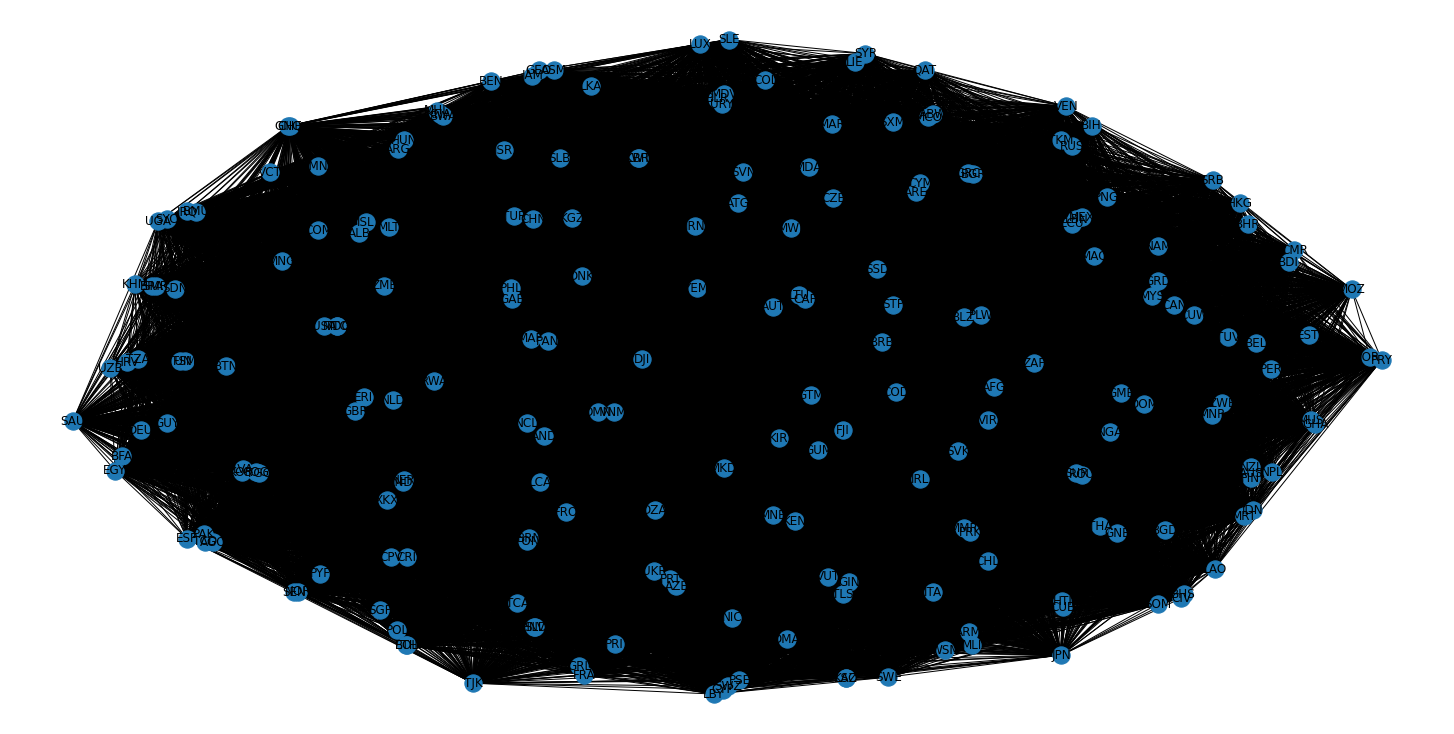

In [91]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10))

nx.draw(g, arrows = True, arrowsize = 2, with_labels = True)

In [110]:
nx.draw(g, with_labels=True,
            edge_color=[g.edges[i, j]['Value'] for i, j in g.edges],
            edgelist = [(u,v) for u,v,e in g.edges(data=True) if e['Value'] >0],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)

ValueError: Invalid RGBA argument: 0.0

In [105]:
g.edges[[g.edges[i, j]['Value'] > 0 for i, j in g.edges]]

ValueError: too many values to unpack (expected 2)

In [108]:
selected_edges = [(u,v) for u,v,e in g.edges(data=True) if e['Value'] >0]